## Pyber Analysis - Three Observed Trends

Observed Trend 1

Approximately 2/3 of the Total Fares by City Type are Urban, even though about 87% of Drivers by City Type are Urban. Therefore, the supply of Urban drivers exceeds their demand.

Observed Trend 2

Approximately 13% of the Total Drivers by City are Suburban and Rural, even though they make up approximately 37% of Total Fares. This likely means that Drivers in these areas are likely to have more repeat customers.

Observed Trend 3

Although less than 1 in 10 Drivers are Rural and about 5% of Total Rides are Rural, Rural trips comprise approximately 7% of Total Fares by City. This means that Rural riders take fewer overall trips, but at a higher average cost than Suburban and Urban Riders. 

In [81]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data_df = pd.merge(ride_data, city_data, how="left", on=["city"])

# Display the data table for preview
city_ride_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

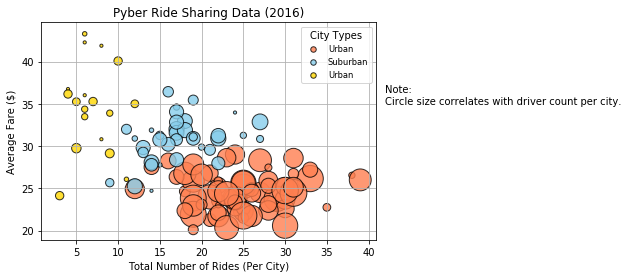

In [82]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = city_ride_data_df[city_ride_data_df["type"] == "Urban"]
suburban_cities = city_ride_data_df[city_ride_data_df["type"] == "Suburban"]
rural_cities = city_ride_data_df[city_ride_data_df["type"] == "Rural"]

urban_rider_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
                                                          
suburban_rider_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]                                                          
                                                          
rural_rider_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]
                                                           

# Build the scatter plots for each city types
plt.scatter(urban_rider_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_rider_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_rider_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
legnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
legnd.legendHandles[0]._sizes = [30]
legnd.legendHandles[1]._sizes = [30]
legnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Figure 1.png")

# Show plot
plt.show()


## Total Fares by City Type

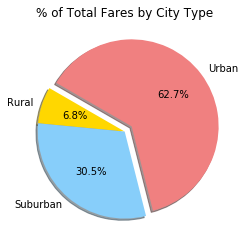

In [83]:
# Calculate Type Percents
type_percents = 100 * city_ride_data_df.groupby(["type"]).sum()["fare"] / city_ride_data_df["fare"].sum()

# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Figure 2.png")

# Show Figure
plt.show()

## Total Rides by City Type

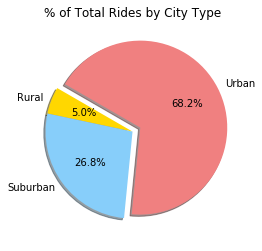

In [84]:
# Calculate Type Percents
type_percents = 100 * city_ride_data_df.groupby(["type"]).sum()["ride_id"] / city_ride_data_df["ride_id"].sum()

# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Figure 3.png")

# Show Figure
plt.show()

## Total Drivers by City Type

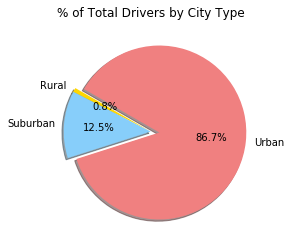

In [85]:
# Calculate Type Percents
type_percents = 100 * city_ride_data_df.groupby(["type"]).sum()["driver_count"] / city_ride_data_df["driver_count"].sum()

# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Figure 4.png")

# Show Figure
plt.show()
